# Explore here

In [1]:
import pandas as pd
print(pd.__version__)

2.3.3


In [61]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest

output_dir = "../data/raw"
output_path = os.path.join(output_dir, "AB_NYC_2019.csv")

url = "https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv"

# Descargar el archivo desde la URL
response = requests.get(url)

# Guardar el contenido descargado en el archivo local
with open(output_path, "wb") as f:
    f.write(response.content)



In [3]:
#Conocimiento del dataset
df = pd.read_csv(output_path)
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
#Conocimiento del dataset
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Mirar si hay duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

0


In [6]:
#Selección de atributos relevantes
df.drop(["id", "host_name", "last_review", "name"], axis = 1, inplace = True)

df.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Análisis univariante

In [7]:
#neighbourhood_group
num_barrios = df['neighbourhood_group'].value_counts()
print(num_barrios)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


<Axes: xlabel='neighbourhood_group'>

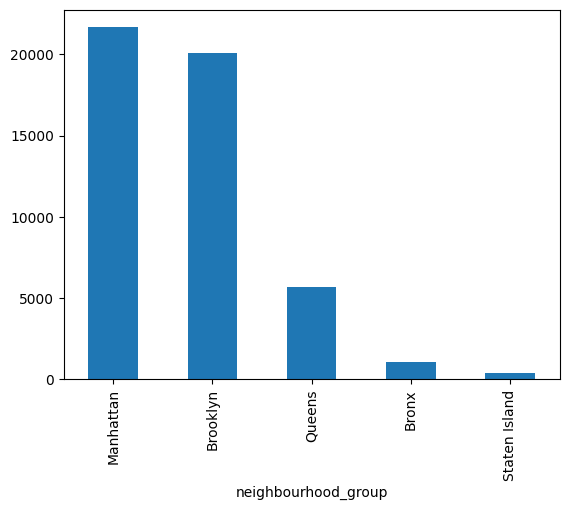

In [8]:
num_barrios.plot(kind='bar')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

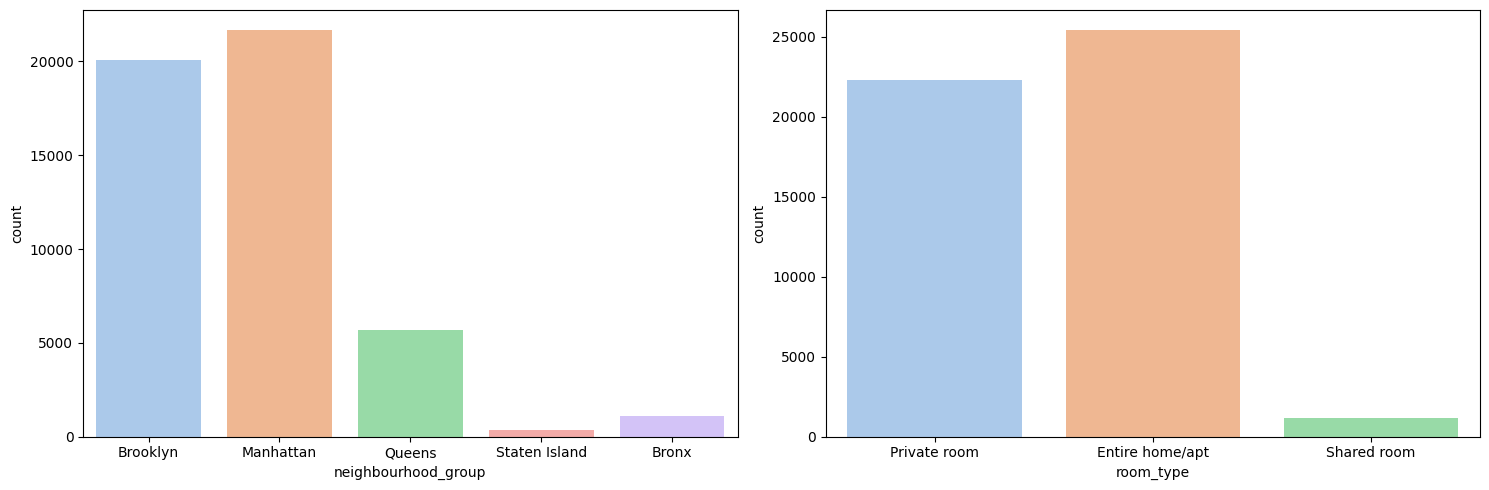

In [10]:
fig, axis = plt.subplots(1, 2, figsize = (15, 5))

sns.countplot(ax = axis[0], data = df, x = "neighbourhood_group", palette='pastel', hue= "neighbourhood_group", legend=False)
sns.countplot(ax = axis[1], data = df, x = "room_type", palette='pastel', hue= "room_type", legend=False)


plt.tight_layout()
plt.show()

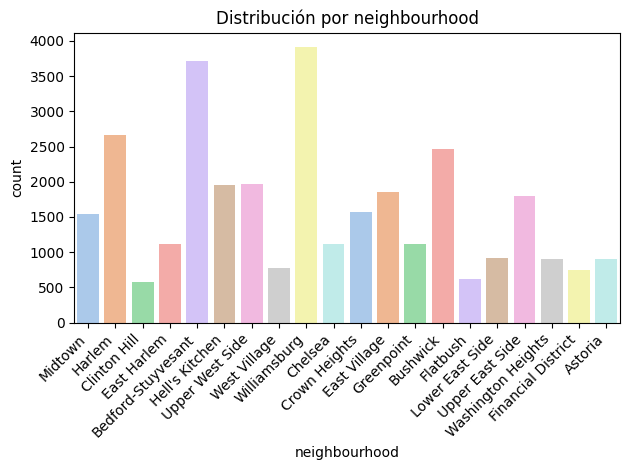

In [38]:
#Countplot del filtrado de los barrios con más immuebles
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(20).index
sns.countplot(data=df[df['neighbourhood'].isin(top_neighbourhoods)], x="neighbourhood", palette='pastel', hue="neighbourhood", legend=False)
plt.title("Distribución por neighbourhood")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
#Cálculo de las estadísticas descriptivas de los precios según el neighbourhood group
groups = df['neighbourhood_group'].unique()
for i, group in enumerate(groups):
    sub = df[df['neighbourhood_group'] == group]
    print(group)
    print(sub['price'].describe())
    print('===========')


Brooklyn
count    20104.000000
mean       124.383207
std        186.873538
min          0.000000
25%         60.000000
50%         90.000000
75%        150.000000
max      10000.000000
Name: price, dtype: float64
Manhattan
count    21661.000000
mean       196.875814
std        291.383183
min          0.000000
25%         95.000000
50%        150.000000
75%        220.000000
max      10000.000000
Name: price, dtype: float64
Queens
count     5666.000000
mean        99.517649
std        167.102155
min         10.000000
25%         50.000000
50%         75.000000
75%        110.000000
max      10000.000000
Name: price, dtype: float64
Staten Island
count     373.000000
mean      114.812332
std       277.620403
min        13.000000
25%        50.000000
50%        75.000000
75%       110.000000
max      5000.000000
Name: price, dtype: float64
Bronx
count    1091.000000
mean       87.496792
std       106.709349
min         0.000000
25%        45.000000
50%        65.000000
75%        99.000000

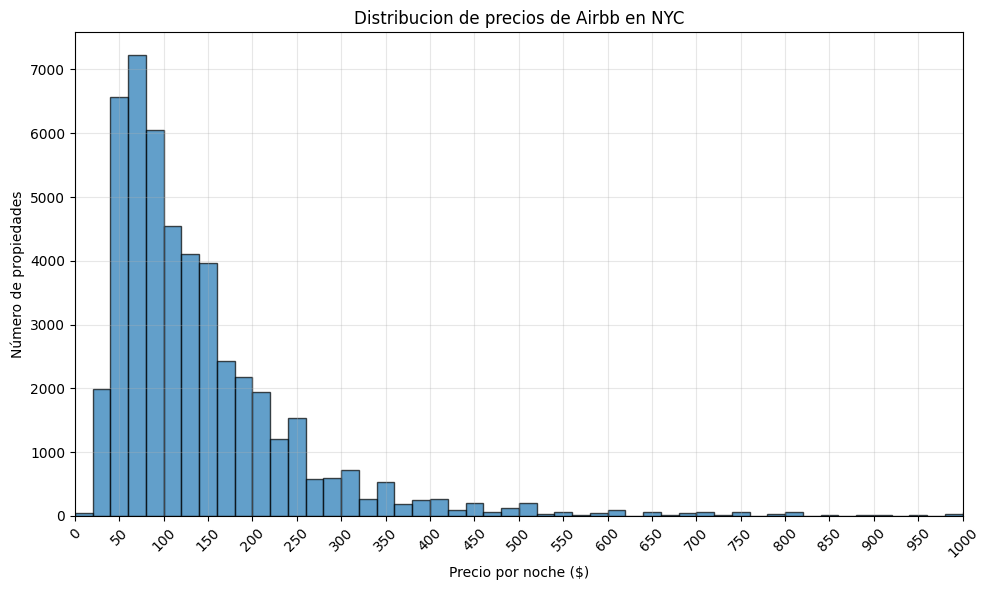

In [13]:
#Histograma de precios
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=500, edgecolor= 'black', alpha= 0.7)
plt. title('Distribucion de precios de Airbb en NYC')
plt.xlabel('Precio por noche ($)')
plt.ylabel('Número de propiedades')
plt.xticks(range(0, 1001, 50), rotation=45) 
plt.xlim(0,1000)
plt.grid(True, alpha=0.3)
plt. tight_layout()
plt.show()

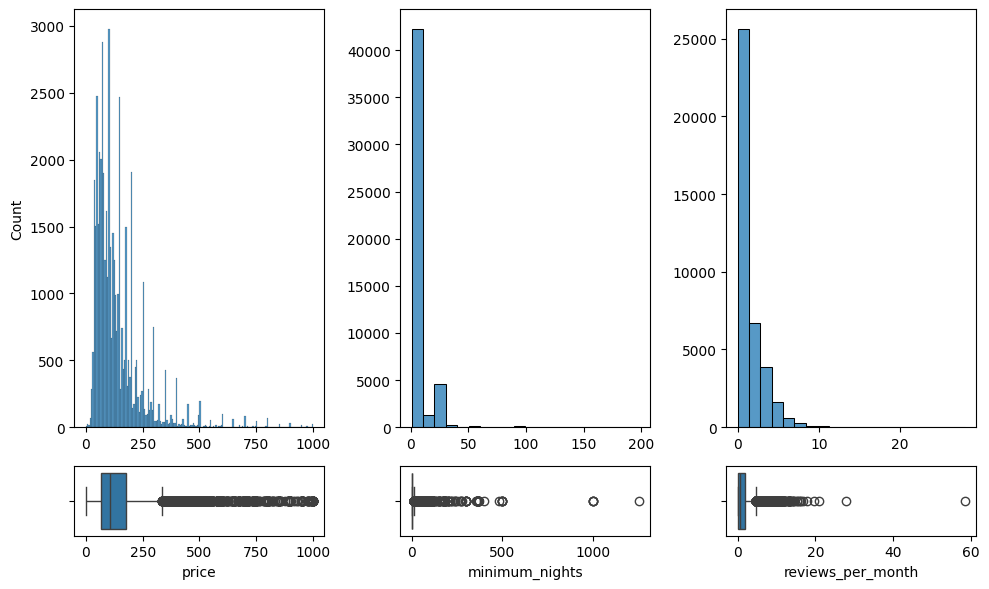

In [14]:
#Conocer la distribución y características estadísticas de variables numéricas.
fig, axis = plt.subplots(2, 3, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = df[df['price'] < 1000], x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df[df['price'] < 1000], x = "price")

sns.histplot(ax = axis[0, 1], data = df[df['minimum_nights'] < 200], x = "minimum_nights", bins=20).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[0, 2], data = df[df['reviews_per_month'] < 40], x = "reviews_per_month", bins=20).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "reviews_per_month")


plt.tight_layout()
plt.show()

<Axes: xlabel='availability_365'>

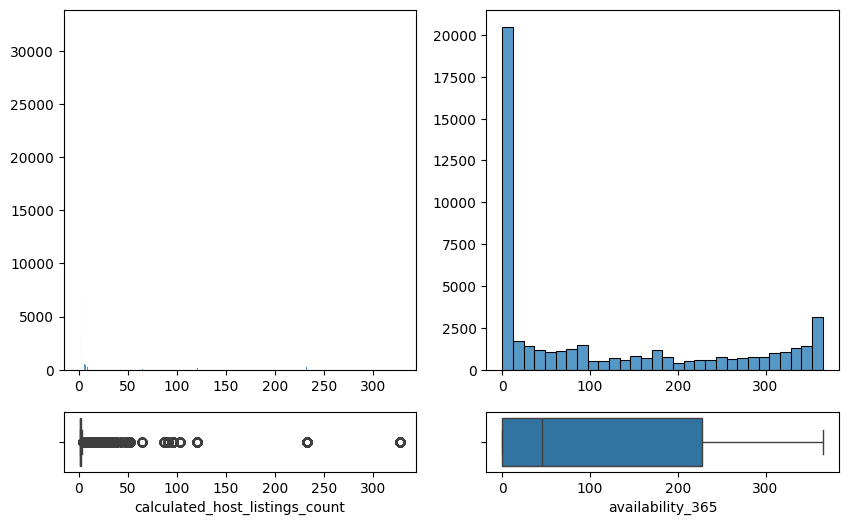

In [15]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "calculated_host_listings_count")

sns.histplot(ax = axis[0, 1], data = df, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "availability_365")



Text(0.5, 1.0, 'Ubications map by neighbourhood')

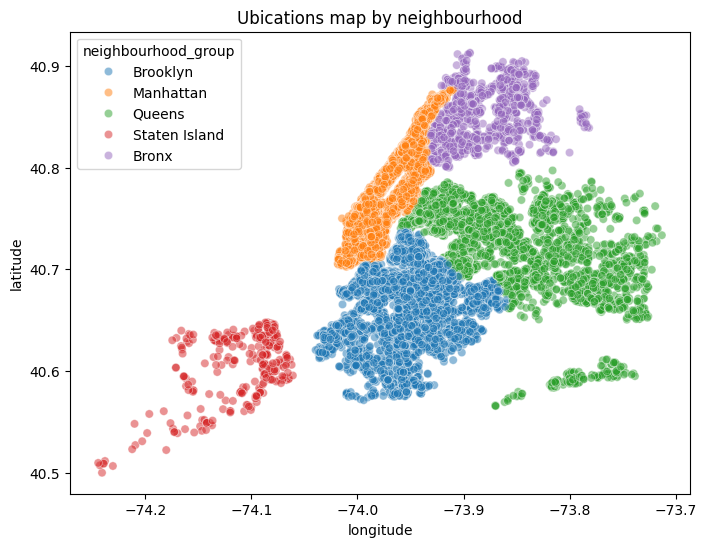

In [16]:
#scatterplot para ver la distribución de los pisos en los barrios de NYC
plt.figure(figsize=(8,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, alpha=0.5)
plt.title('Ubications map by neighbourhood')

### Análisis multivariante

#### Análisis numérico-numérico

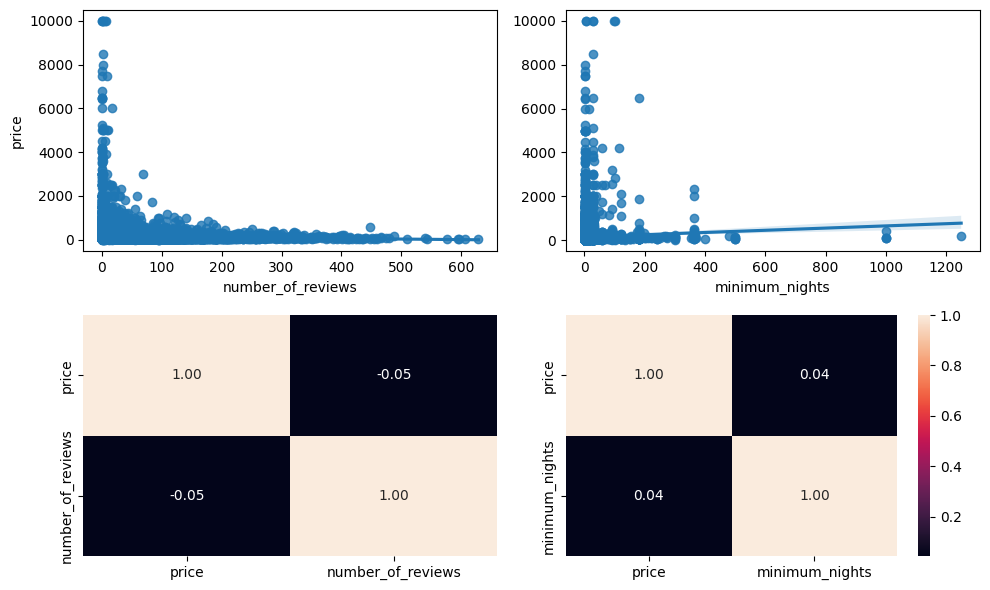

In [17]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "number_of_reviews", y = "price")
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "minimum_nights", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

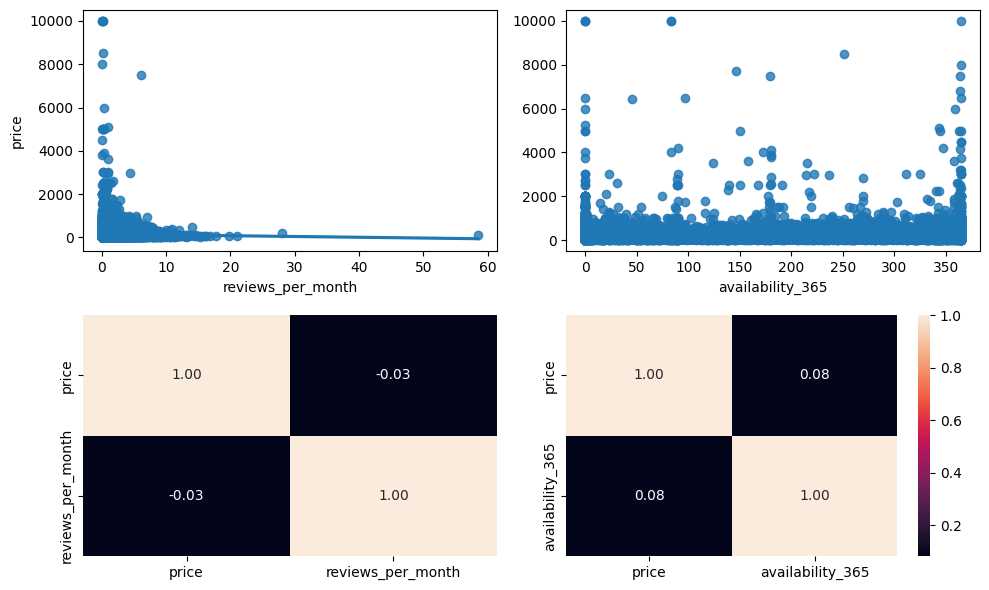

In [18]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "reviews_per_month", y = "price")
sns.heatmap(df[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

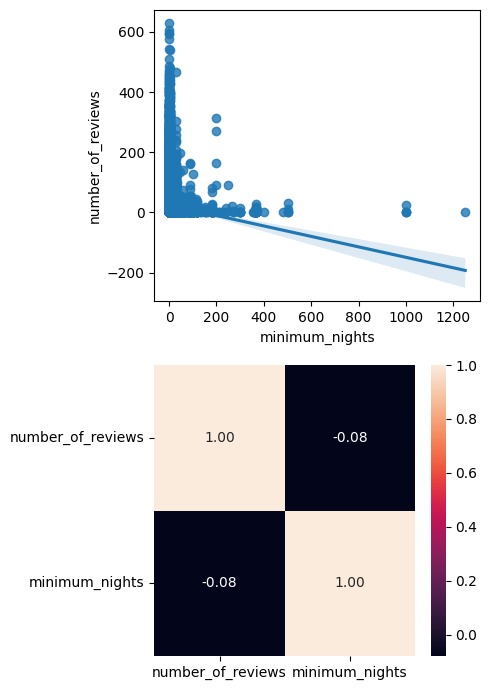

In [19]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = df, x = "minimum_nights", y = "number_of_reviews")
sns.heatmap(df[["number_of_reviews", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1])


plt.tight_layout()
plt.show()

In [20]:
#Media de precios según el host_id
host_avg = df.groupby("host_id")["price"].mean().reset_index()
print(host_avg)

         host_id       price
0           2438   95.000000
1           2571  182.000000
2           2787  100.666667
3           2845  162.000000
4           2868   60.000000
...          ...         ...
37452  274273284  140.000000
37453  274298453   54.000000
37454  274307600  190.000000
37455  274311461  200.000000
37456  274321313  125.000000

[37457 rows x 2 columns]


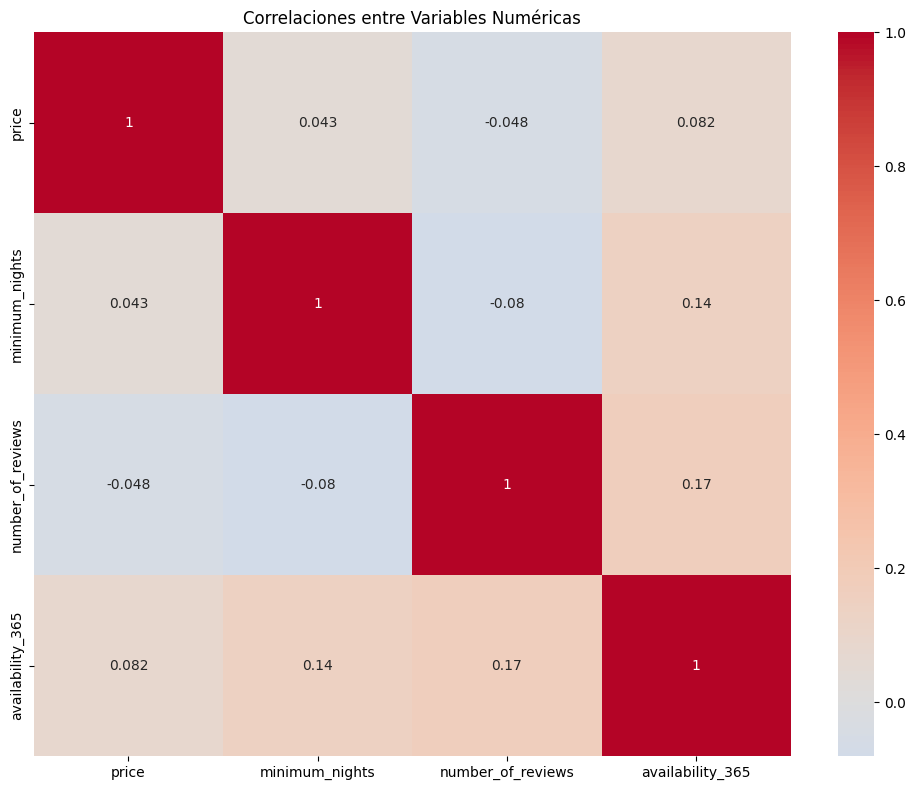

In [21]:
# Mapa de calor de correlaciones variables numéricas
plt.figure(figsize=(10, 8))
numeric_cols=['price', 'minimum_nights', 'number_of_reviews', 'availability_365']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt. title('Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()

#### Análisis categórico-categórico

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

/tmp/ipykernel_1609/2098573275.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')


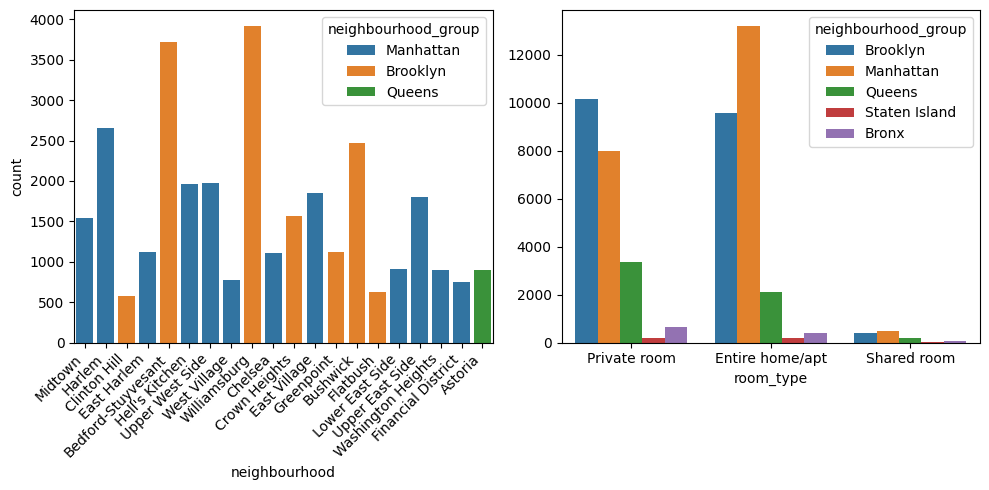

In [23]:
fig, axis = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(ax = axis[0], data = df[df['neighbourhood'].isin(top_neighbourhoods)], x = "neighbourhood", hue = "neighbourhood_group")
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')
sns.countplot(ax = axis[1], data = df, x = "room_type", hue = "neighbourhood_group").set(ylabel = None)

plt.tight_layout()
plt.show()

<Axes: xlabel='room_type'>

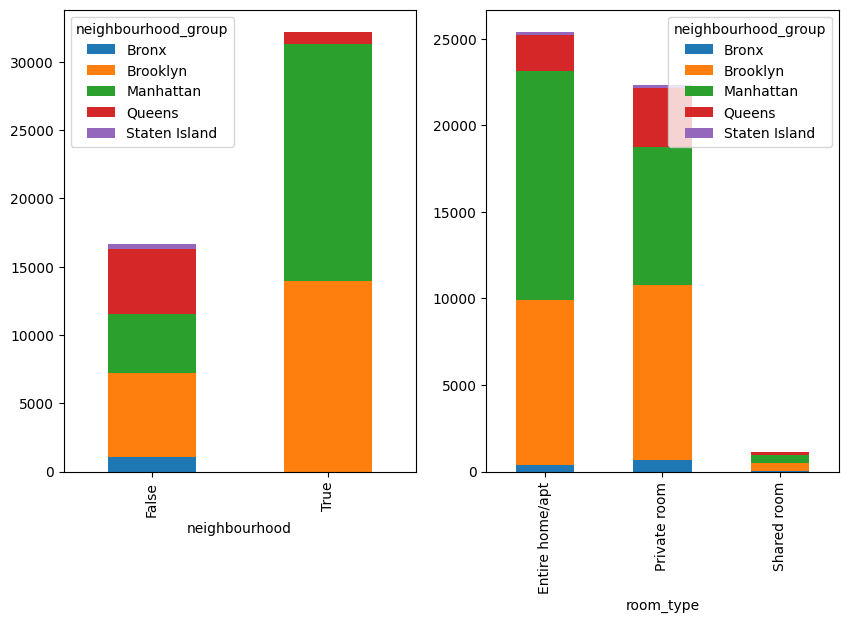

In [24]:
fig, axis = plt.subplots(1, 2, figsize = (10, 6))

crosstab_neighbourhood = pd.crosstab(df['neighbourhood'].isin(top_neighbourhoods), df['neighbourhood_group'])
crosstab_neighbourhood.div(crosstab_neighbourhood.sum(1).astype(float), axis=0)
crosstab_neighbourhood.plot(kind='bar', stacked=True, ax = axis[0])

crosstab_room = pd.crosstab(df['room_type'], df['neighbourhood_group'])
crosstab_room.div(crosstab_room.sum(1).astype(float), axis=0)
crosstab_room.plot(kind='bar', stacked=True, ax = axis[1])

In [34]:
#Análisis de correlaciones
df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood_n"] = pd.factorize(df["neighbourhood"])[0]
df["room_type_n"] = pd.factorize(df["room_type"])[0]
df

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0          2787            Brooklyn          Kensington  40.64749  -73.97237   
1          2845           Manhattan             Midtown  40.75362  -73.98377   
2          4632           Manhattan              Harlem  40.80902  -73.94190   
3          4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4          7192           Manhattan         East Harlem  40.79851  -73.94399   
...         ...                 ...                 ...       ...        ...   
48890   8232441            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891   6570630            Brooklyn            Bushwick  40.70184  -73.93317   
48892  23492952           Manhattan              Harlem  40.81475  -73.94867   
48893  30985759           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894  68119814           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews  \
0         Private room    149               1                  9   
1      Entire home/apt    225               1                 45   
2         Private room    150               3                  0   
3      Entire home/apt     89               1                270   
4      Entire home/apt     80              10                  9   
...                ...    ...             ...                ...   
48890     Private room     70               2                  0   
48891     Private room     40               4                  0   
48892  Entire home/apt    115              10                  0   
48893      Shared room     55               1                  0   
48894     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.21                               6               365   
1                   0.38                               2               355   
2                    NaN                               1               365   
3                   4.64                               1               194   
4                   0.10                               1                 0   
...                  ...                             ...               ...   
48890                NaN                               2                 9   
48891                NaN                               2                36   
48892                NaN                               1                27   
48893                NaN                               6                 2   
48894                NaN                               1                23   

       neighbourhood_group_n  neighbourhood_n  room_type_n  
0                          0                0            0  
1                          1                1            1  
2                          1                2            0  
3                          0                3            1  
4                          1                4            1  
...                      ...              ...          ...  
48890                      0                6            0  
48891                      0               21            0  
48892                      1                2            1  
48893                      1                7            2  
48894                      1                7            0  

[48895 rows x 15 columns]

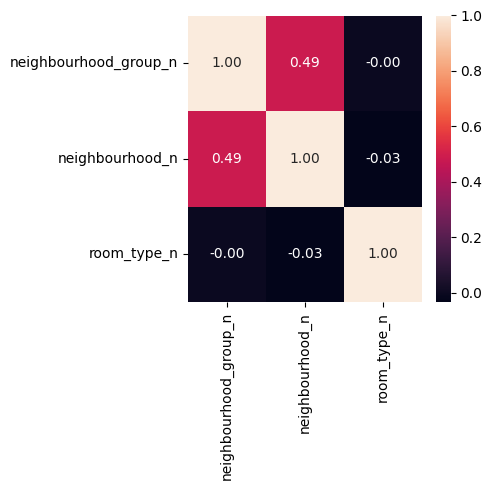

In [35]:
#correlaciones variabables categóricas
fig, axis = plt.subplots(figsize = (5, 5))

sns.heatmap(df[["neighbourhood_group_n", "neighbourhood_n", "room_type_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

#### Análisis numérico-categórico

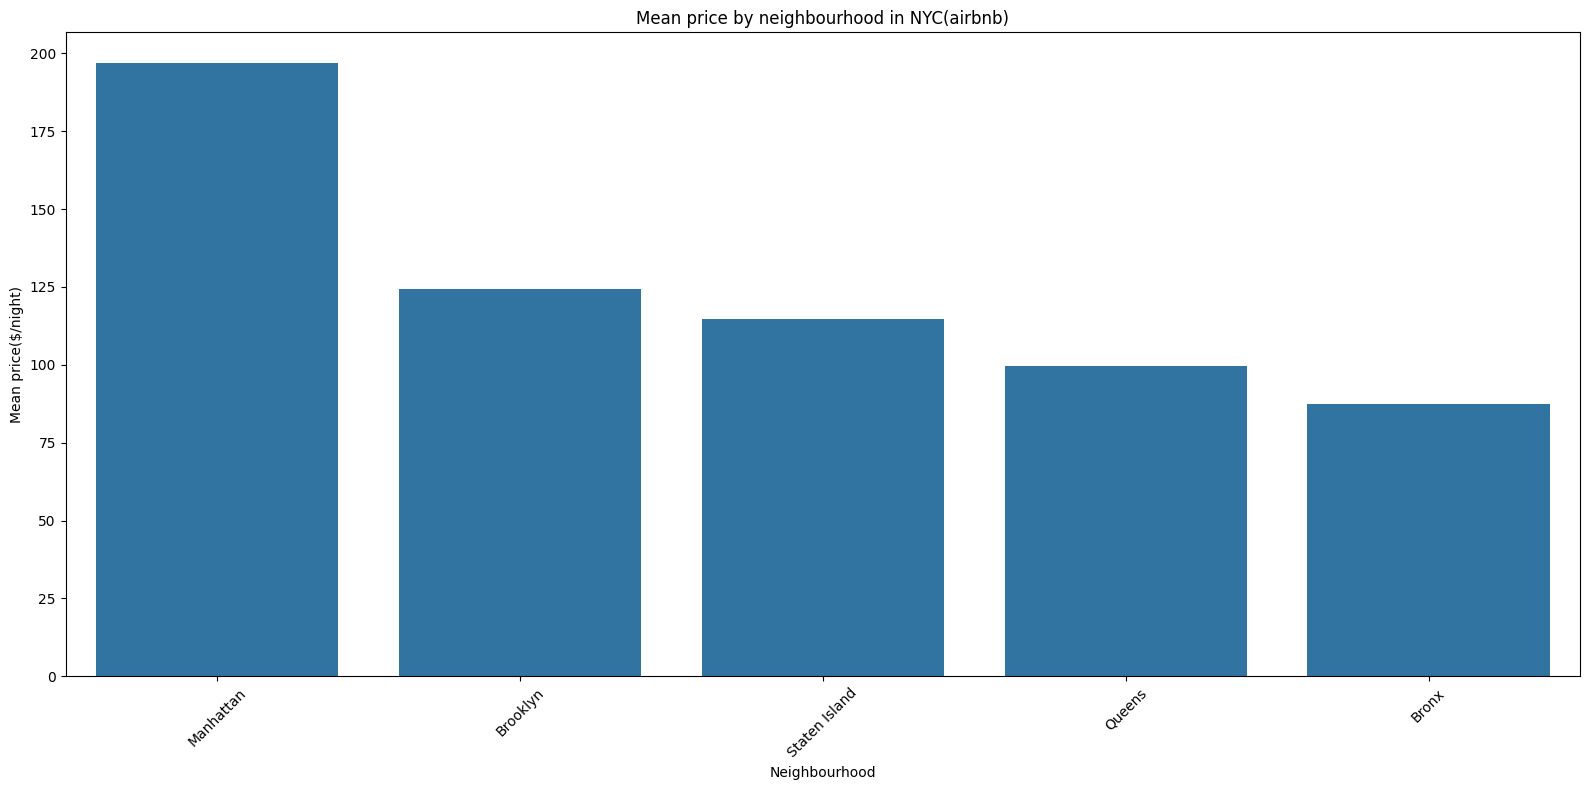

In [25]:
#Gráfico de barras de la media de precio por barrio
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending = False)

plt.figure(figsize=(16,8))
sns.barplot(x=avg_price.index, y=avg_price.values)

plt.xticks(rotation = 45)
plt.title('Mean price by neighbourhood in NYC(airbnb)')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean price($/night)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1609/3432280232.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1609/3432280232.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1609/3432280232.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[2].set_xticklabels(axis[2].get_xticklabels(), rotation=60, ha='right')


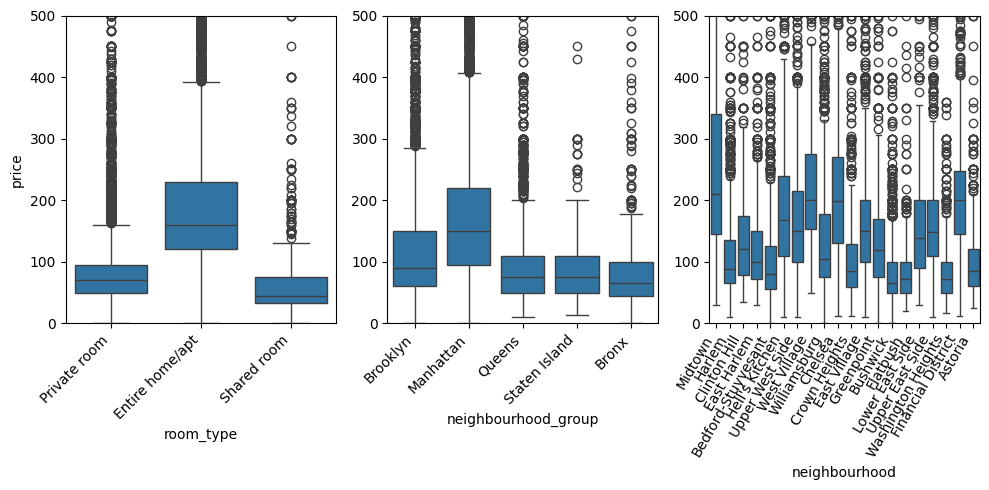

In [26]:
#Distribución de precios según tipo de habitación, grupo de barrio y barrio
fig, axis = plt.subplots(1, 3, figsize = (10, 5))
sns.boxplot(ax= axis[0], data=df, x='room_type', y='price')
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')
axis[0].set_ylabel("price")
axis[0].set_ylim(0, 500)

sns.boxplot(ax = axis[1], data = df, x = "neighbourhood_group", y= "price")
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45, ha='right')
axis[1].set_ylabel(None)
axis[1].set_ylim(0, 500)

sns.boxplot(ax = axis[2], data = df[df['neighbourhood'].isin(top_neighbourhoods)], x = "neighbourhood", y= "price").set(ylabel = None)
axis[2].set_xticklabels(axis[2].get_xticklabels(), rotation=60, ha='right')
axis[2].set_ylabel(None)
axis[2].set_ylim(0, 500)


plt.tight_layout()
plt.show()

/tmp/ipykernel_1609/590132483.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1609/590132483.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=60, ha='right')
/tmp/ipykernel_1609/590132483.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[2].set_xticklabels(axis[2].get_xticklabels(), rotation=45, ha='right')


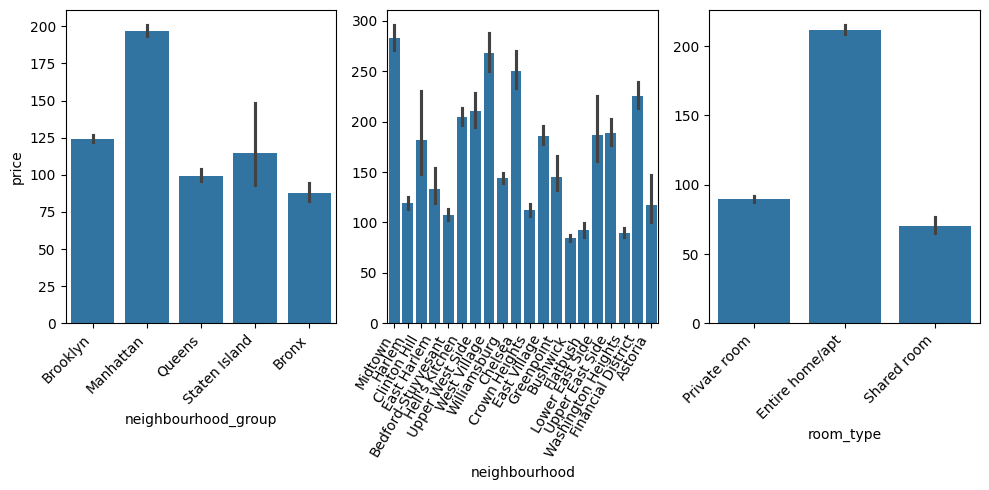

In [27]:
#Precio medio por grupo de barrio, barrio y tipo de habitación
fig, axis = plt.subplots(1, 3, figsize = (10, 5))

sns.barplot(ax = axis[0], data = df, x = "neighbourhood_group", y= "price")
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')
sns.barplot(ax = axis[1], data = df[df['neighbourhood'].isin(top_neighbourhoods)], x = "neighbourhood", y= "price").set(ylabel = None)
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=60, ha='right')
sns.barplot(ax = axis[2], data = df, x = "room_type", y= "price").set(ylabel = None)
axis[2].set_xticklabels(axis[2].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

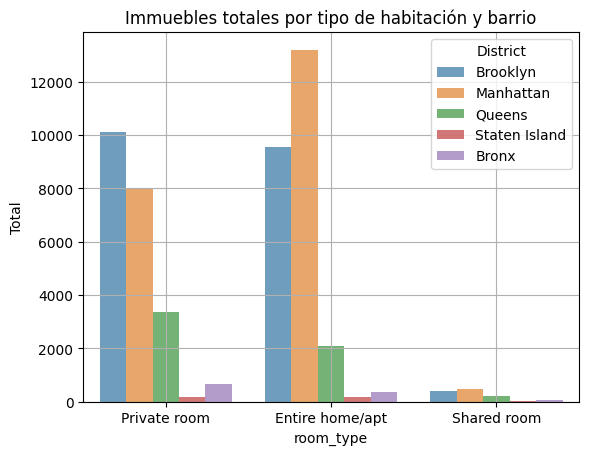

In [39]:
#Immuebles totales por tipo de habitación y barrio

sns.countplot(df, x = 'room_type', hue='neighbourhood_group', alpha = 0.7)
plt.title('Immuebles totales por tipo de habitación y barrio')
plt.ylabel('Total')
plt.legend(title = 'District')
plt.grid()
plt.show()

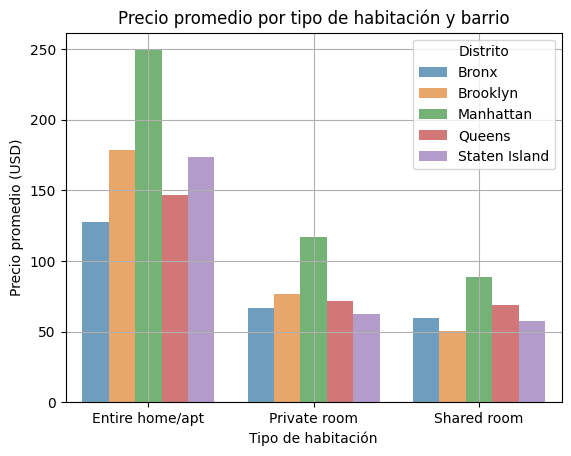

In [41]:
# Precios promedio agrupados por tipo de habitación y barrio
avg_price = df.groupby(['room_type', 'neighbourhood_group'])['price'].mean().reset_index()

# Crear el gráfico
sns.barplot(data=avg_price, x='room_type', y='price', hue='neighbourhood_group', alpha=0.7)

plt.title('Precio promedio por tipo de habitación y barrio')
plt.ylabel('Precio promedio (USD)')
plt.xlabel('Tipo de habitación')
plt.legend(title='Distrito')
plt.grid(True)
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

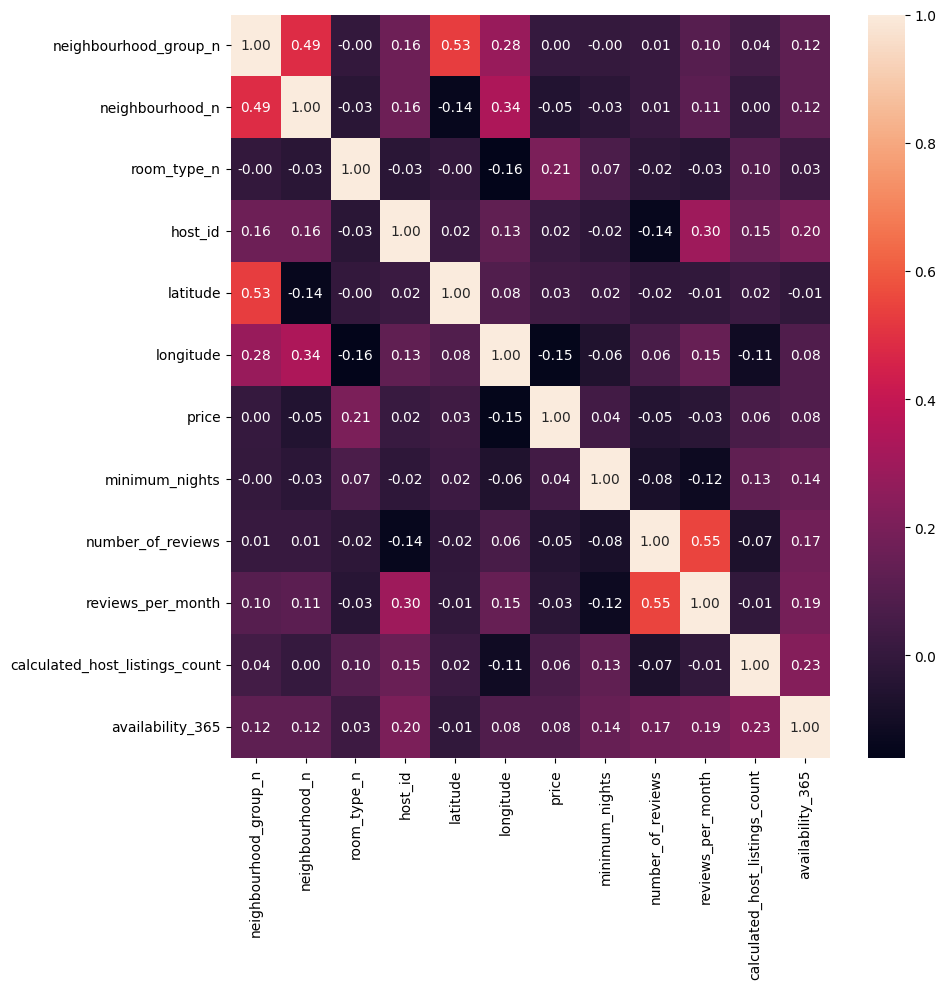

In [37]:
#correlaciones todo con todo
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(df[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "host_id", "latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

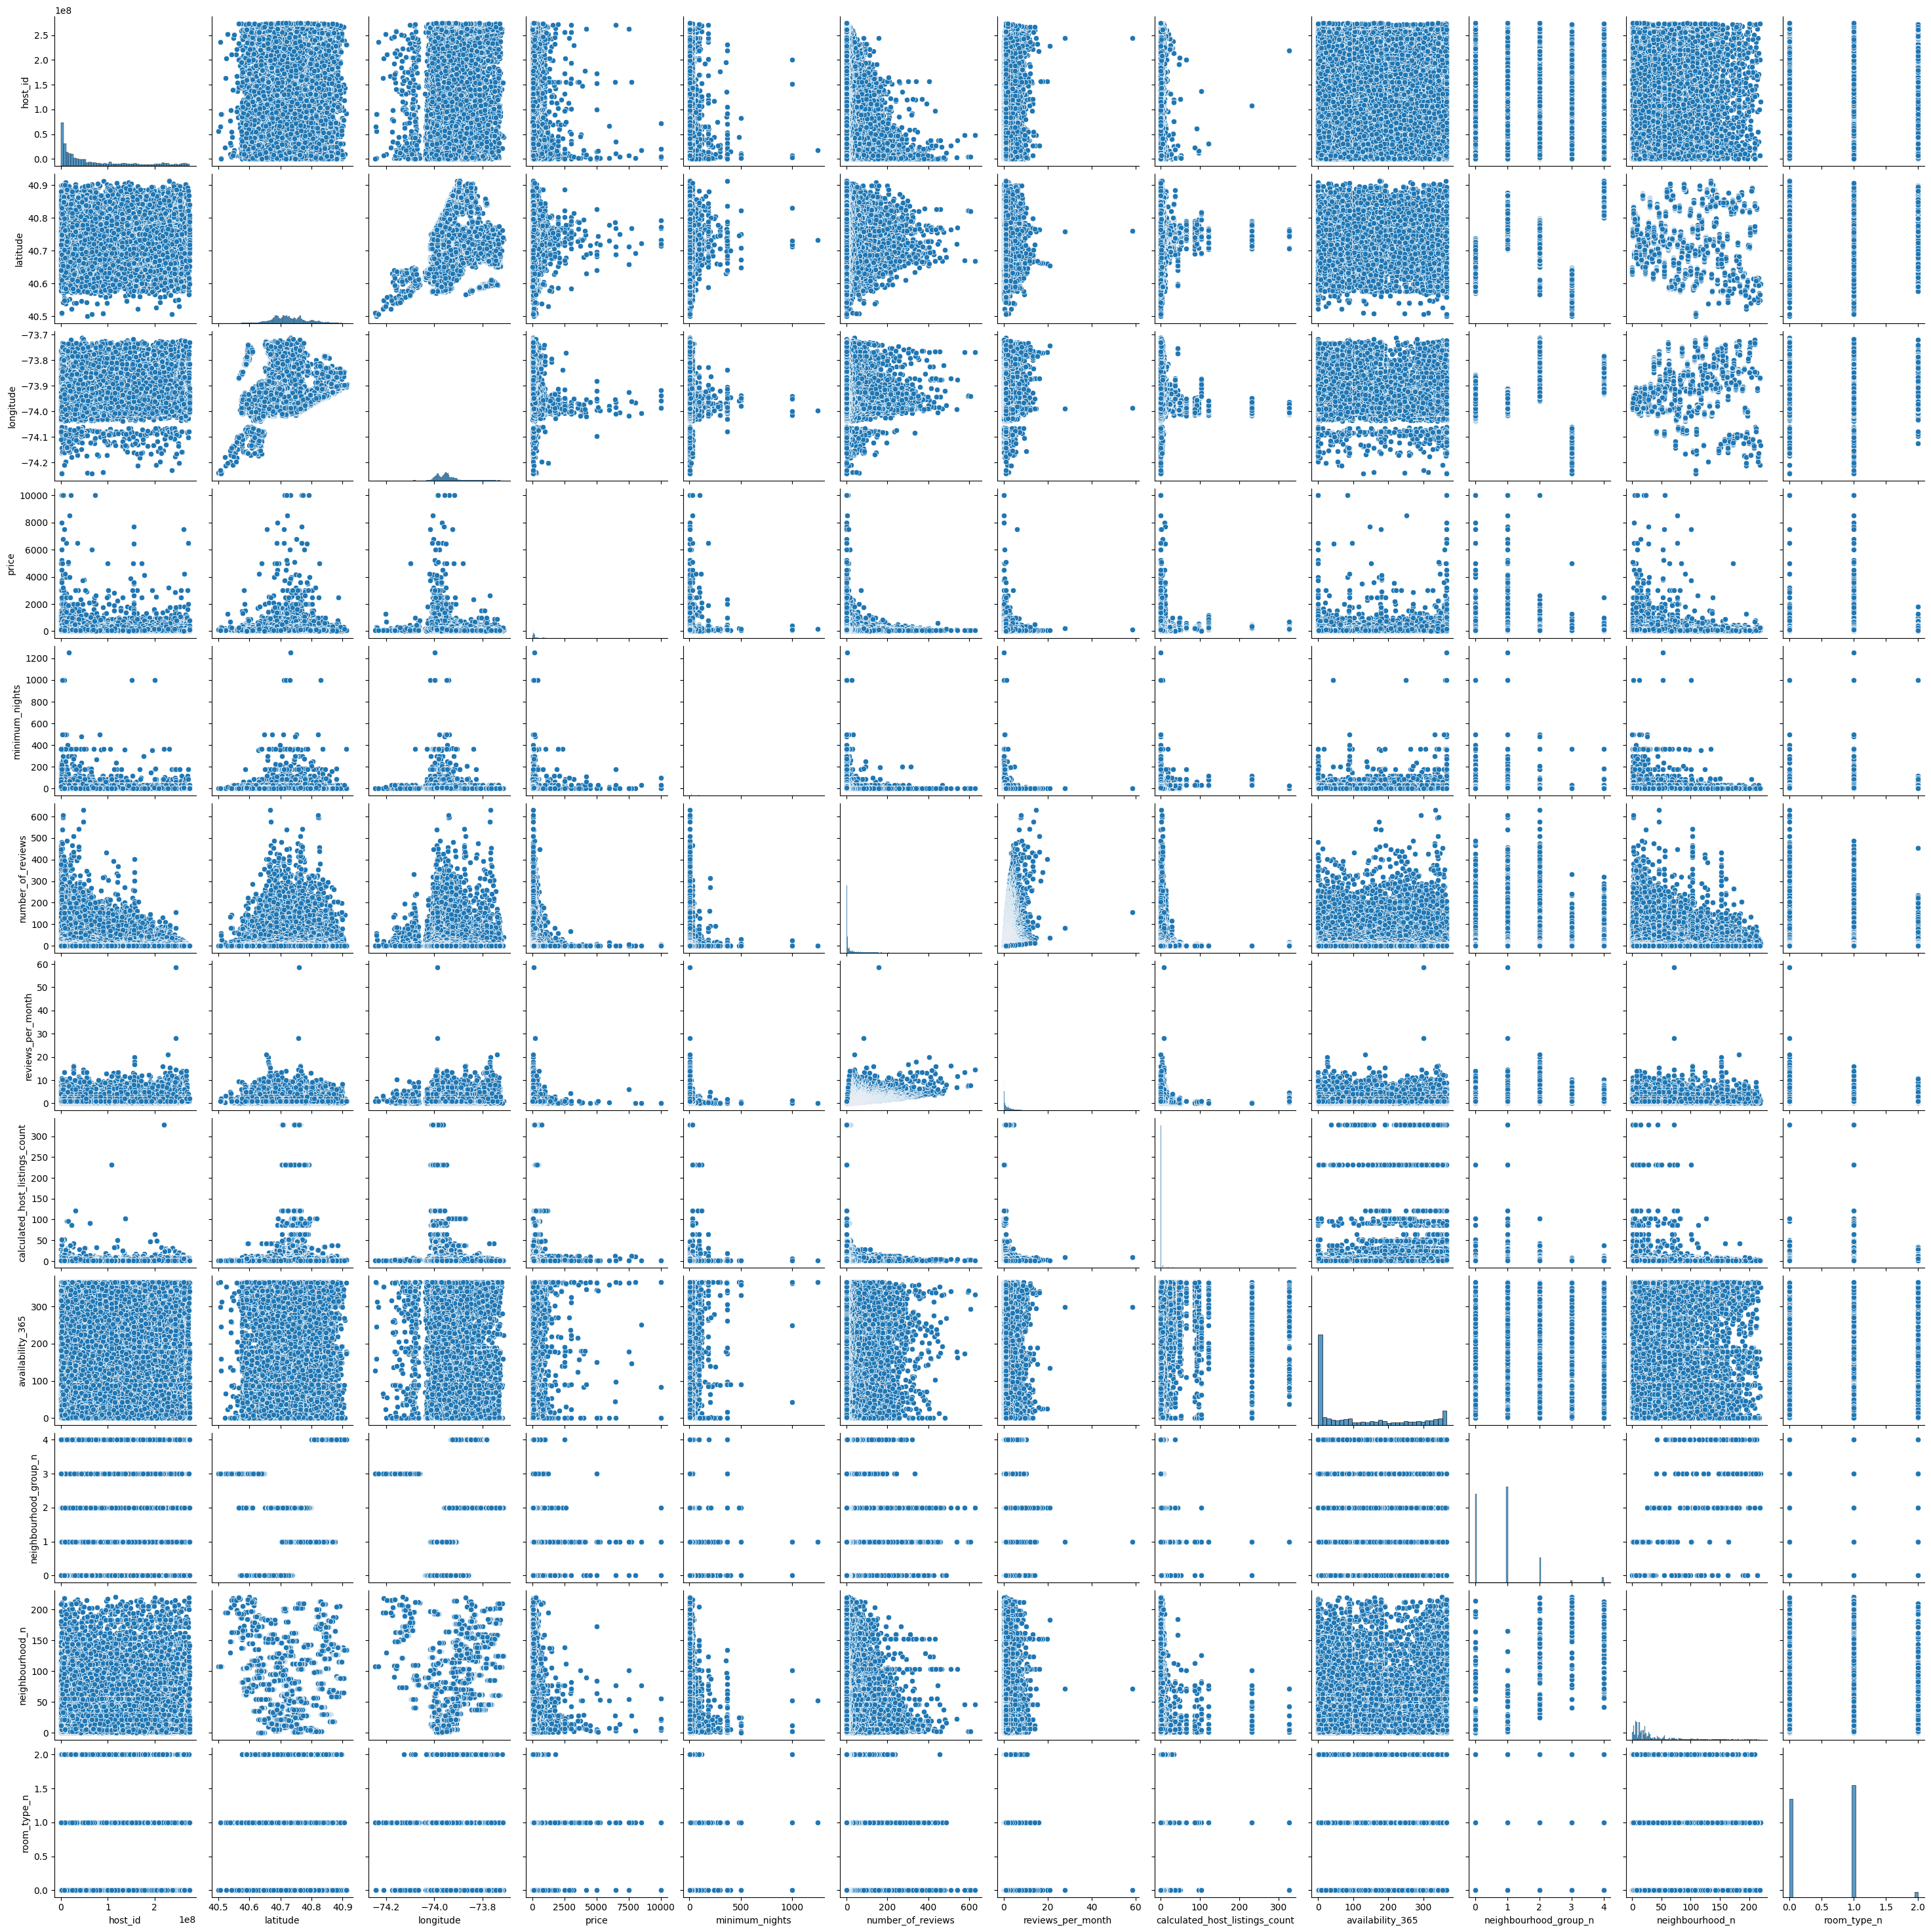

In [42]:
# Más relaciones todos con todos
sns.pairplot(data = df)

#### Valores atípicos

In [43]:
df.describe()

host_id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   6.762001e+07     40.728949    -73.952170    152.720687        7.029962   
std    7.861097e+07      0.054530      0.046157    240.154170       20.510550   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.822033e+06     40.690100    -73.983070     69.000000        1.000000   
50%    3.079382e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763115    -73.936275    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  neighbourhood_group_n  neighbourhood_n   room_type_n  
count      48895.000000           48895.000000     48895.000000  48895.000000  
mean         112.781327               0.786911        29.888782      0.567113  
std          131.622289               0.844386        34.676634      0.541249  
min            0.000000               0.000000         0.000000      0.000000  
25%            0.000000               0.000000         7.500000      0.000000  
50%           45.000000               1.000000        19.000000      1.000000  
75%          227.000000               1.000000        37.000000      1.000000  
max          365.000000               4.000000       220.000000      2.000000

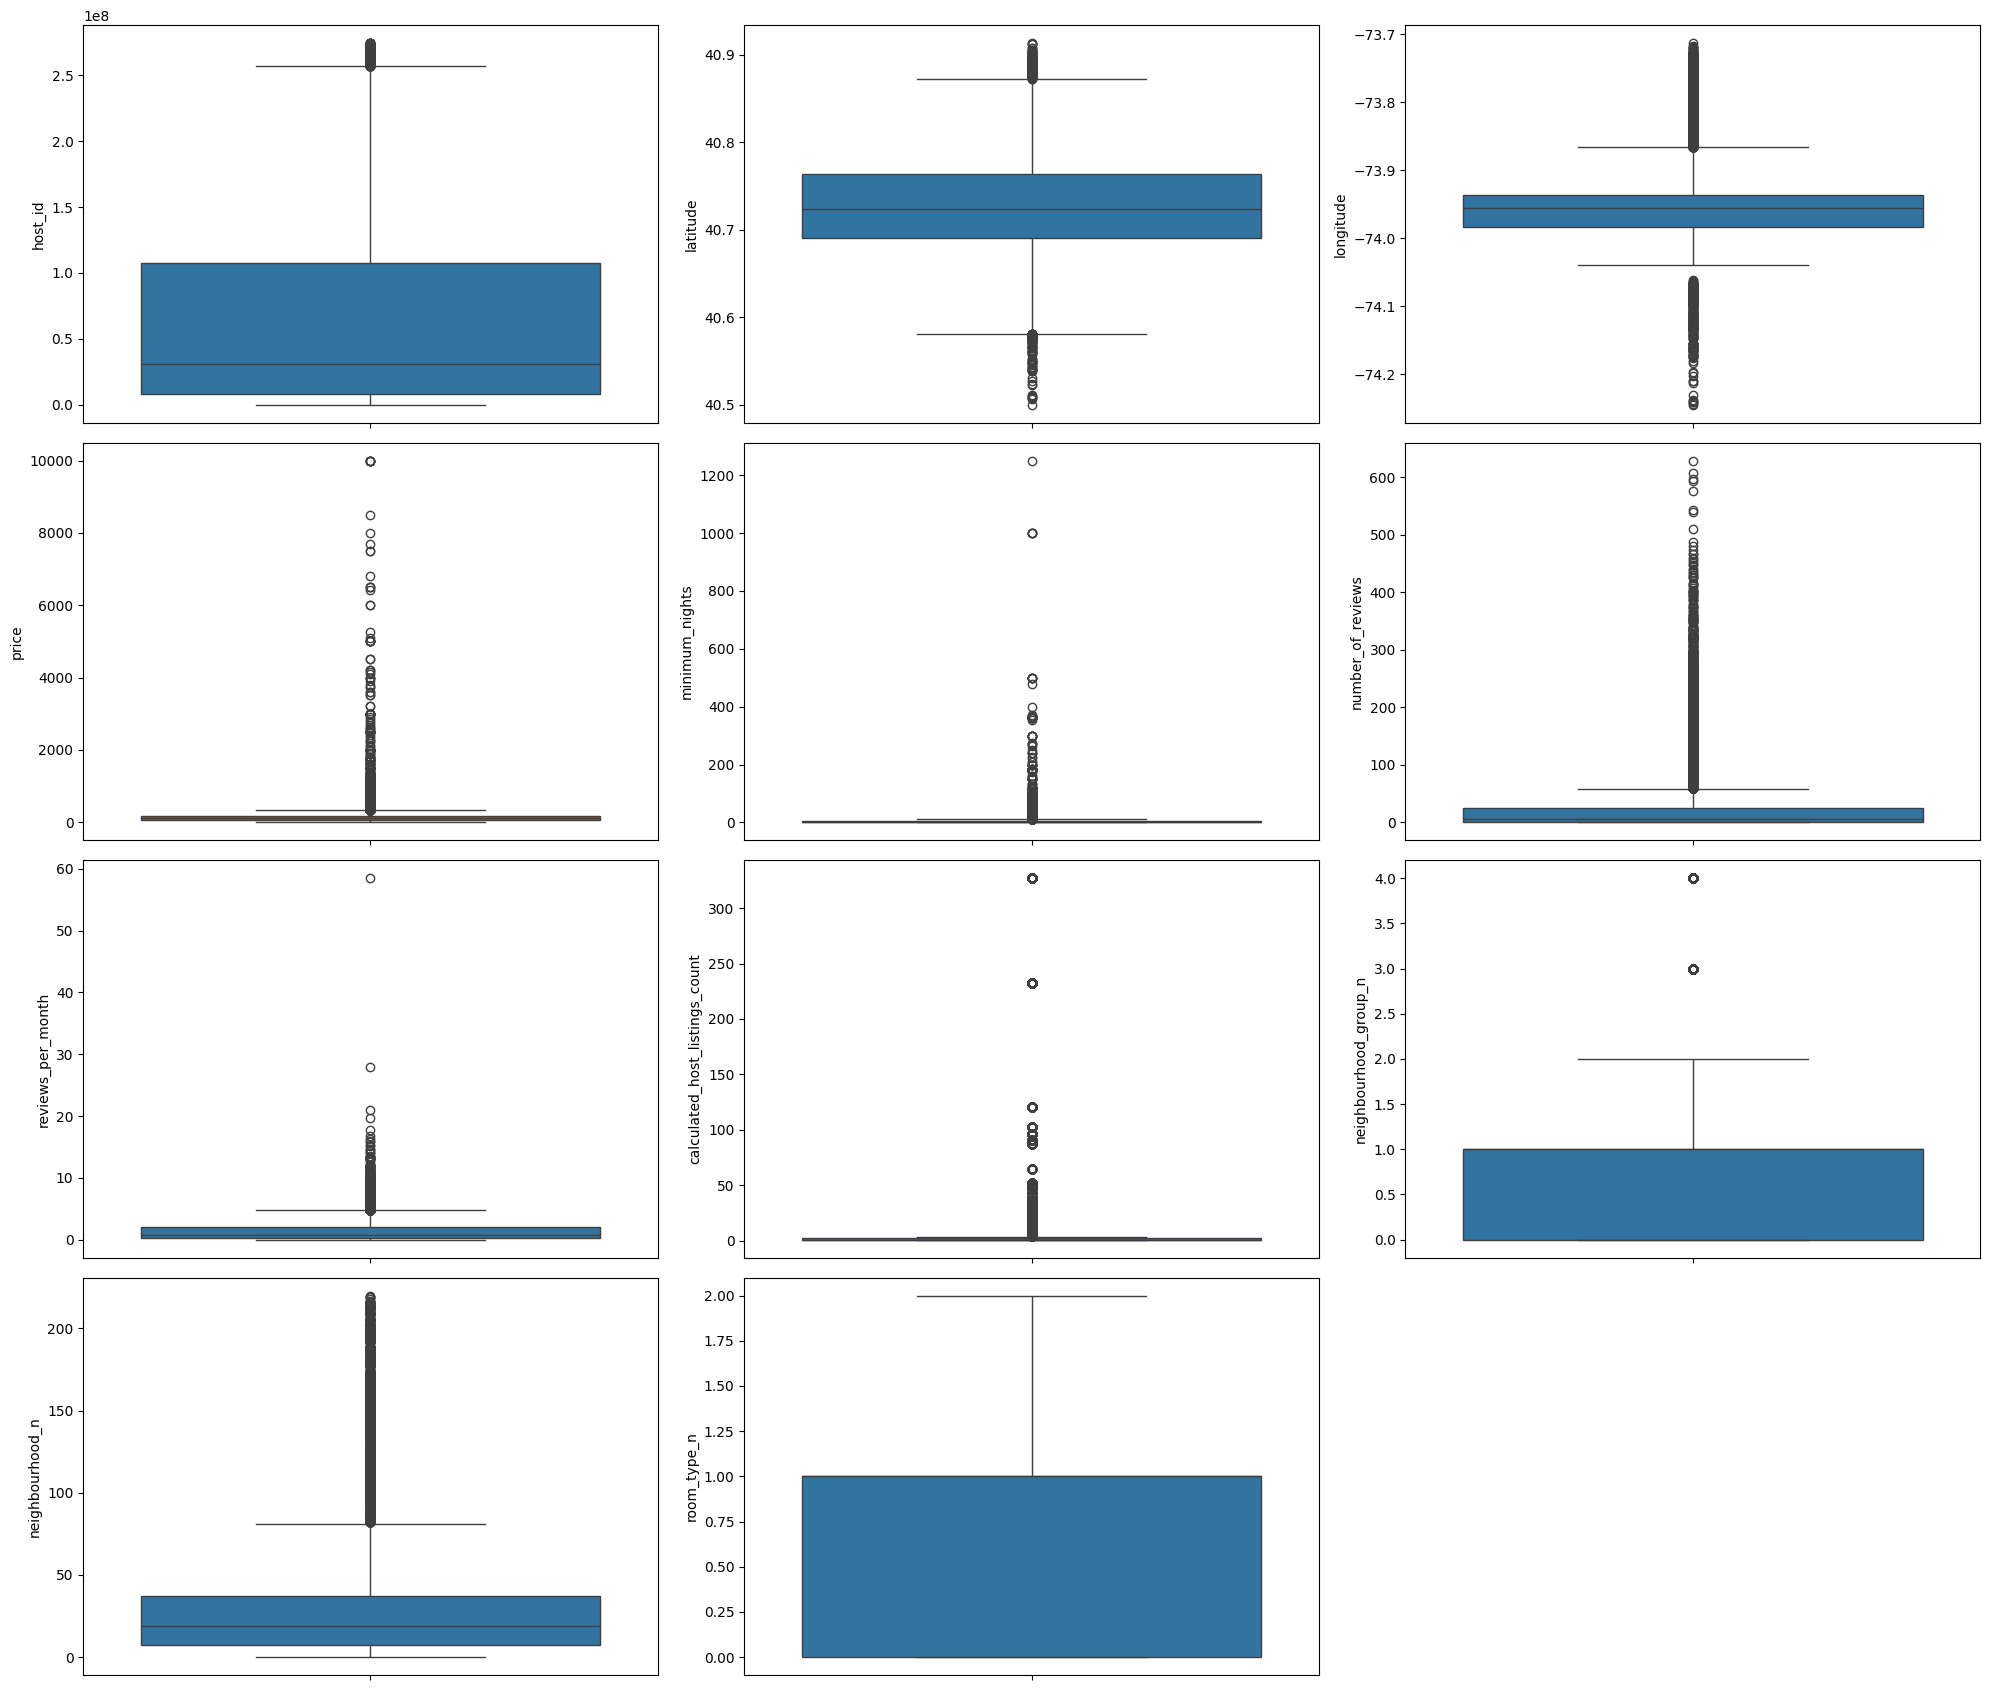

In [46]:
fig, axis = plt.subplots(4, 3, figsize = (20, 17))

sns.boxplot(ax = axis[0, 0], data = df, y = "host_id")
sns.boxplot(ax = axis[0, 1], data = df, y = "latitude")
sns.boxplot(ax = axis[0, 2], data = df, y = "longitude")
sns.boxplot(ax = axis[1, 0], data = df, y = "price")
sns.boxplot(ax = axis[1, 1], data = df, y = "minimum_nights")
sns.boxplot(ax = axis[1, 2], data = df, y = "number_of_reviews")
sns.boxplot(ax = axis[2, 0], data = df, y = "reviews_per_month")
sns.boxplot(ax = axis[2, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 2], data = df, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[3, 0], data = df, y = "neighbourhood_n")
sns.boxplot(ax = axis[3, 1], data = df, y = "room_type_n")


fig.delaxes(axis[3, 2])
plt.tight_layout()

plt.show()

In [47]:
#Mirar si es necesario eliminar outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers de precio son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers de precio son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [49]:
#Mirar outliers extremos porque hay muchos
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 493.0 y -249.0, con un rango intercuartílico de 106.0


In [50]:
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers de minimum nigths son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers de minimum nigths son 11.0 y -5.0, con un rango intercuartílico de 4.0


In [51]:
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 17.0 y -11.0, con un rango intercuartílico de 4.0


In [53]:
minimum_nigths_altas = df[df['minimum_nights'] >= 17]
minimum_nigths_altas

host_id neighbourhood_group              neighbourhood  latitude  \
6           7356            Brooklyn         Bedford-Stuyvesant  40.68688   
14         11975           Manhattan               West Village  40.73530   
36          7355            Brooklyn         Bedford-Stuyvesant  40.68876   
45         49670            Brooklyn  Prospect-Lefferts Gardens  40.65944   
55         56512            Brooklyn               Williamsburg  40.70881   
...          ...                 ...                        ...       ...   
48810  274014453           Manhattan            Upper West Side  40.79952   
48843   53966115            Brooklyn         Bedford-Stuyvesant  40.69635   
48871  144008701           Manhattan                     Harlem  40.82233   
48879     540335            Brooklyn               Williamsburg  40.71728   
48882   66058896            Brooklyn                   Bushwick  40.69652   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
6      -73.95596     Private room     60              45                 49   
14     -74.00525  Entire home/apt    120              90                 27   
36     -73.94312     Private room     35              60                  0   
45     -73.96238  Entire home/apt    150              29                 11   
55     -73.95930  Entire home/apt    150              30                105   
...          ...              ...    ...             ...                ...   
48810  -73.96003     Private room     75              30                  0   
48843  -73.93743     Private room     45              29                  0   
48871  -73.94687     Private room     35              29                  0   
48879  -73.94394  Entire home/apt    120              20                  0   
48882  -73.91079     Private room     40              20                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
6                   0.40                               1                 0   
14                  0.22                               1                 0   
36                   NaN                               1               365   
45                  0.49                               1                95   
55                  0.90                               1                30   
...                  ...                             ...               ...   
48810                NaN                               1                90   
48843                NaN                               2               341   
48871                NaN                               2                31   
48879                NaN                               1                22   
48882                NaN                               1                31   

       neighbourhood_group_n  neighbourhood_n  room_type_n  
6                          0                6            0  
14                         1               11            1  
36                         0                6            0  
45                         0               24            1  
55                         0               12            1  
...                      ...              ...          ...  
48810                      1                8            0  
48843                      0                6            0  
48871                      1                2            0  
48879                      0               12            1  
48882                      0               21            0  

[5603 rows x 15 columns]

In [55]:
minimum_nigths_altas.shape

(5603, 15)

In [62]:
df_filtrado = df[df['minimum_nights'] <= 100]
eliminados = df[df['minimum_nights'] > 100]
print(f"Se eliminaron {len(eliminados)} registros con más de 100 noches mínimas.")

Se eliminaron 174 registros con más de 100 noches mínimas.


In [65]:
df_filtrado.shape

(48721, 15)

Esto se haría con cada una de las variables que muestren outliers. Una vez hecho, buscar IQR para ver cuáles deberían eliminarse en caso de que haya que eliminarlos.

#### Valores faltantes

In [56]:
df.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
neighbourhood_group                   0
host_id                               0
latitude                              0
longitude                             0
room_type                             0
neighbourhood                         0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
neighbourhood_group_n                 0
neighbourhood_n                       0
room_type_n                           0
dtype: int64

In [57]:
# en porcentaje
df.isnull().sum().sort_values(ascending=False) / len(df)

reviews_per_month                 0.205583
neighbourhood_group               0.000000
host_id                           0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
neighbourhood                     0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
neighbourhood_group_n             0.000000
neighbourhood_n                   0.000000
room_type_n                       0.000000
dtype: float64

In [ ]:
#Imputar reseñas por mes a partir de número de reseñas y host_id
median_reviews_per_month = df.groupby(['number_of_reviews', 'host_id'])['reviews_per_month'].median().reset_index()
median_reviews_per_month = median_reviews_per_month.rename(columns={'reviews_per_month': 'median_reviews_per_month'})

median_reviews_per_month


number_of_reviews   host_id  median_reviews_per_month
0                      0      4632                       NaN
1                      0      7355                       NaN
2                      0     11175                       NaN
3                      0     14444                       NaN
4                      0     14751                       NaN
...                  ...       ...                       ...
45417                576  47621202                     13.40
45418                594   4734398                      7.57
45419                597   4734398                      7.72
45420                607   4734398                      7.75
45421                629  47621202                     14.58

[45422 rows x 3 columns]

No tiene sentido calcular una mediana a partir de variables con algunos valores de 0.

In [66]:
# Dividimos el conjunto de datos en muestras de train y test
X = df_filtrado.drop("price", axis = 1)
y = df_filtrado["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

X_train.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
9993   40371157               Bronx      Longwood  40.82417  -73.90156   
26068  30384194              Queens       Astoria  40.75713  -73.91334   
29658  57791424           Manhattan  East Village  40.72406  -73.98275   
23606  10697117            Brooklyn      Flatbush  40.64844  -73.96214   
16310  20109188            Brooklyn  Williamsburg  40.70413  -73.93205   

             room_type  minimum_nights  number_of_reviews  reviews_per_month  \
9993      Private room               1                182               3.82   
26068     Private room               3                  1               0.05   
29658  Entire home/apt               3                  2               0.15   
23606     Private room               5                  2               0.08   
16310  Entire home/apt               2                102               2.68   

       calculated_host_listings_count  availability_365  \
9993                                2                 0   
26068                               2               328   
29658                               1                 0   
23606                               1                 0   
16310                               1               284   

       neighbourhood_group_n  neighbourhood_n  room_type_n  
9993                       4               99            0  
26068                      2               56            0  
29658                      1               19            1  
23606                      0               22            0  
16310                      0               12            1

In [60]:
num_variables = ["latitude", "latitude", "minimum_nights", "number_of_reviews", "availability_365"]

In [67]:
# Instanciar el escalador
scaler = StandardScaler()

# Entrenar el escalador con los datos de entrenamiento
scaler.fit(X_train[num_variables])

# Aplicar el escalador en amhos
X_train_num_scal = scaler.transform(X_train[num_variables])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_variables)

X_test_num_scal = scaler.transform(X_test[num_variables])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_variables)

X_train_num_scal.head()

latitude  latitude  minimum_nights  number_of_reviews  availability_365
9993   1.754249  1.754249       -0.513083           3.573937         -0.855226
26068  0.519466  0.519466       -0.316715          -0.499286          1.641916
29658 -0.089637 -0.089637       -0.316715          -0.476782         -0.855226
23606 -1.482451 -1.482451       -0.120347          -0.476782         -0.855226
16310 -0.456720 -0.456720       -0.414899           1.773618          1.306934

In [68]:
cat_variables = ["neighbourhood_group","room_type"]

In [70]:
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

# instanciar el encoder
label_encoder_neighbourhood_group = LabelEncoder()
label_encoder_room_type = LabelEncoder()

# entreno el encoder con los datos de entrenamiento
label_encoder_neighbourhood_group .fit(X_train['neighbourhood_group'])
label_encoder_room_type.fit(X_train['room_type'])

# aplico el encoder en ambos
X_train_cat_le['neighbourhood_group_le'] = label_encoder_neighbourhood_group.transform(X_train['neighbourhood_group'])
X_train_cat_le['room_type_le'] = label_encoder_room_type.transform(X_train['room_type'])

X_test_cat_le['neighbourhood_group_le'] = label_encoder_neighbourhood_group.transform(X_test['neighbourhood_group'])
X_test_cat_le['room_type_le'] = label_encoder_room_type.transform(X_test['room_type'])

X_train_cat_le.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
9993   40371157               Bronx      Longwood  40.82417  -73.90156   
26068  30384194              Queens       Astoria  40.75713  -73.91334   
29658  57791424           Manhattan  East Village  40.72406  -73.98275   
23606  10697117            Brooklyn      Flatbush  40.64844  -73.96214   
16310  20109188            Brooklyn  Williamsburg  40.70413  -73.93205   

             room_type  minimum_nights  number_of_reviews  reviews_per_month  \
9993      Private room               1                182               3.82   
26068     Private room               3                  1               0.05   
29658  Entire home/apt               3                  2               0.15   
23606     Private room               5                  2               0.08   
16310  Entire home/apt               2                102               2.68   

       calculated_host_listings_count  availability_365  \
9993                                2                 0   
26068                               2               328   
29658                               1                 0   
23606                               1                 0   
16310                               1               284   

       neighbourhood_group_n  neighbourhood_n  room_type_n  \
9993                       4               99            0   
26068                      2               56            0   
29658                      1               19            1   
23606                      0               22            0   
16310                      0               12            1   

       neighbourhood_group_le  room_type_le  
9993                        0             1  
26068                       3             1  
29658                       2             0  
23606                       1             1  
16310                       1             0

#### Conclusión
La exploración gráfica y las transformaciones aplicadas aportaron mayor comprensión sobre la distribución de precios y la oferta por zona, aunque las correlaciones numéricas no mostraron relaciones fuertes.
Los promedios de precio varían según el tipo de alojamiento y el distrito: los alojamientos completos presentan tarifas significativamente superiores a las habitaciones privadas o compartidas, probablemente debido a mayores niveles de comodidad, privacidad y capacidad.
Por último, la variable minimum_nights contiene registros atípicos (p. ej., 365, 1000 o más) que parecen errores de entrada; por ello se decidió excluir las observaciones con más de 100 noches mínimas.